In [1]:
import numpy as np
import pandas as pd
import scipy.stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../data/combinedData.csv')
target = pd.read_csv('../data/combinedTarget.csv')

data = data.merge(target, how='left',on=['Provider','Set'])
data.drop(columns = ['Unnamed: 0_x','Unnamed: 0_y'], inplace=True)

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,13,14,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Set', 'Status', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'Alzheimer', 'HeartFailure', 'KidneyDisease',
       'Cancer', 'ObstrPulmonary', 'Depression', 'Diabetes', 'IschemicHeart',
       'Osteoporasis', 'RheumatoidArthritis', 'Stro

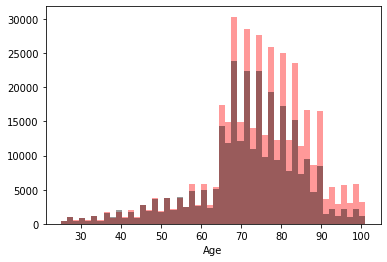

In [8]:
sns.distplot(a=data.query('Gender==0')['Age'], kde=False, color = 'red', bins = 50)
sns.distplot(a=data.query('Gender==1')['Age'], kde=False, color = 'black', bins = 50)

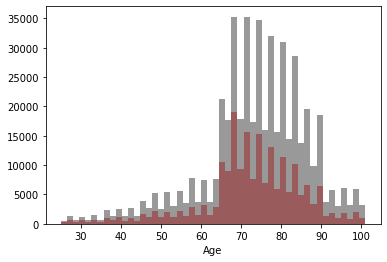

In [4]:
sns.distplot(a=data.query('Diabetes==0')['Age'], kde=False, color = 'red')
sns.distplot(a=data.query('Diabetes==1')['Age'], kde=False, color = 'black')

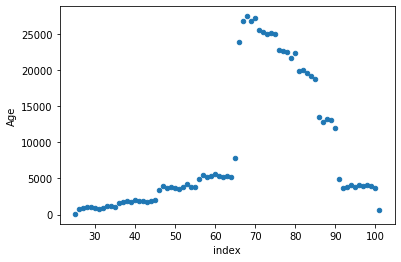

In [34]:
pd.DataFrame(data.Age.value_counts()).reset_index().plot.scatter(y = 'Age', x='index')

In [73]:
data.groupby(['BeneID'])['Age'].nunique().reset_index().query('Age==3')['BeneID']

37079     BENE134641
73943      BENE25804
111658     BENE63554
135270     BENE87189
Name: BeneID, dtype: object

In [74]:
data[data.BeneID.isin(ThreeAgeBene)][['BeneID','State','Age','ClaimStartDt','ClaimDays','Provider','PotentialFraud']].sort_values(['BeneID','ClaimStartDt'])

,BeneID,State,Age,ClaimStartDt,ClaimDays,Provider,PotentialFraud
138832,BENE134641,Georgia,85.0,2008-12-23,15,PRV52464,No
138833,BENE134641,Georgia,86.0,2009-03-03,1,PRV52347,Yes
674515,BENE134641,Georgia,86.0,2009-04-15,1,PRV52338,?
138834,BENE134641,Georgia,86.0,2009-06-03,1,PRV52351,No
674516,BENE134641,Georgia,86.0,2009-06-16,1,PRV52338,?
138835,BENE134641,Georgia,86.0,2009-06-29,15,PRV52351,No
138836,BENE134641,Georgia,86.0,2009-08-02,1,PRV52312,No
138837,BENE134641,Georgia,87.0,2009-12-31,1,PRV52323,No
17017,BENE25804,Iowa,79.0,2008-12-19,21,PRV52985,Yes
17018,BENE25804,Iowa,80.0,2009-01-10,1,PRV52985,Yes


In [60]:
data[data.BeneID.isin(ThreeAgeBene)][['Provider','PotentialFraud']].groupby('PotentialFraud').count()

,Provider
PotentialFraud,
?,6
No,9
Yes,28


### Warmup Question 2:
#### Study the relationship between the patient ages (at the time of their service) and the counts of medical claims.

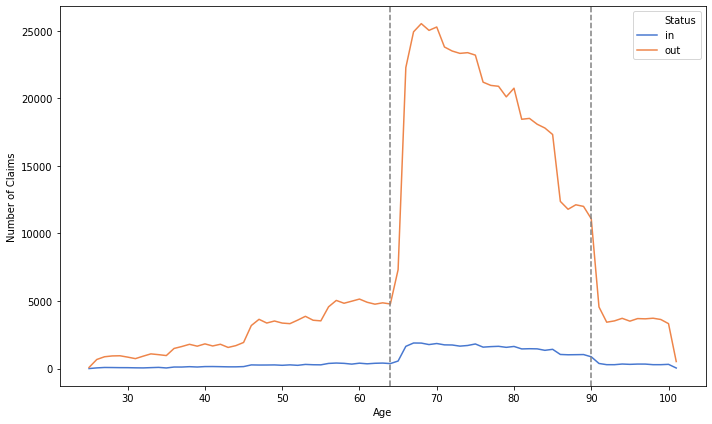

In [82]:
sns.set_palette('muted')

hue_feature = 'Status'
age_claims = data.groupby(['Age',hue_feature])['ClaimID'].count().reset_index()


plt.figure(figsize=(10,6))


ax1 = sns.lineplot(x='Age',y='ClaimID',
                      hue=hue_feature,
                      data=age_claims)

ax1.set(ylabel='Number of Claims')
plt.tight_layout()
plt.axvline(64,color='grey', linestyle='--')
plt.axvline(90,color='grey', linestyle='--')
ax1.figure.savefig("../visualizations/aiko/age_Claims.png",bbox_inches='tight')


# ax2 = sns.lineplot(x='Age',y=np.log(age_claims.ClaimID),
#                       hue=hue_feature,
#                       data=age_claims)


# ax2.set(ylabel='Number of Claims')
# plt.tight_layout()

# plt.axvline(64,color='grey', linestyle='--')
# plt.axvline(90,color='grey', linestyle='--')

# ax2.figure.savefig("../visualizations/aiko/age_logClaims.png",bbox_inches='tight')

Plot shows sharp rise after retirement age. Shape of rise and fall across all ages is consistent across inpatient & outpatient, and train & test sets.

Questions:
- Is this due to some sudden onset of disease after 65?
- Is there a retirement scheme in the works?

No it's just people's medicare activates at 65

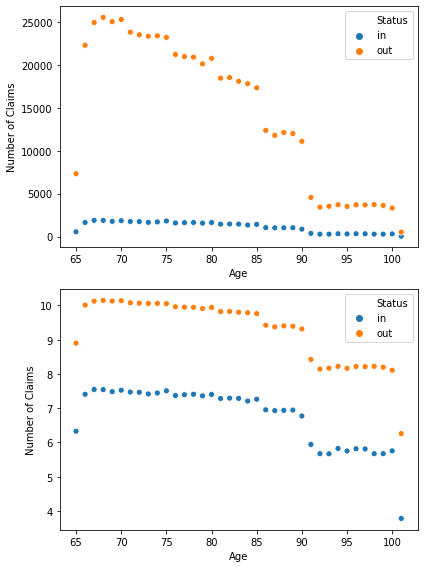

In [39]:
plt.figure(figsize=(6,8))

ax1 = plt.subplot(211)
ax1 = sns.scatterplot(x='Age',y='ClaimID',
                      hue=hue_feature,
                      data=age_claims[age_claims.Age >= 65])

ax1.set(ylabel='Number of Claims')
plt.tight_layout()
ax2 = plt.subplot(212)
ax2 = sns.scatterplot(x='Age',y=np.log(age_claims.ClaimID),
                      hue=hue_feature,
                      data=age_claims[age_claims.Age >= 65])

ax2.set(ylabel='Number of Claims')
plt.tight_layout()

#### Study the relationship between the patient age and their chornic conditions. 
- Within the train-samples, do these chronic conditions show a definite trend with respect to increasing ages?

In [85]:
age_chronics

,Age,Set,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke
0,25.0,Test,5,6,4,1,0,8,12,9,0,3,1
1,25.0,Train,38,58,39,3,14,43,58,66,15,12,9
2,26.0,Test,54,81,32,21,36,55,77,84,32,29,19
3,26.0,Train,205,303,197,41,149,276,361,388,156,126,44
4,27.0,Test,93,105,75,24,61,100,134,124,51,57,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,99.0,Train,1507,2123,1423,462,1156,1618,2346,2543,1038,1012,370
150,100.0,Test,303,484,332,115,271,328,534,551,260,251,99
151,100.0,Train,1261,1966,1338,428,1076,1427,2230,2327,925,978,321
152,101.0,Test,47,68,57,23,39,39,72,70,33,33,9


In [86]:
age_chronics = data.groupby(['Age','Set'])['Alzheimer', 'HeartFailure', 'KidneyDisease',
       'Cancer', 'ObstrPulmonary', 'Depression', 'Diabetes', 'IschemicHeart',
       'Osteoporasis', 'RheumatoidArthritis', 'Stroke'].sum().reset_index()

from sklearn.preprocessing import scale

age_chronics_scaled = scale(age_chronics[['Alzheimer', 'HeartFailure', 'KidneyDisease',
       'Cancer', 'ObstrPulmonary', 'Depression', 'Diabetes', 'IschemicHeart',
       'Osteoporasis', 'RheumatoidArthritis', 'Stroke']])

In [92]:
age_chronics_scaled = pd.concat([age_chronics[['Age','Set']],pd.DataFrame(age_chronics_scaled, columns = ['Alzheimer', 'HeartFailure', 'KidneyDisease',
       'Cancer', 'ObstrPulmonary', 'Depression', 'Diabetes', 'IschemicHeart',
       'Osteoporasis', 'RheumatoidArthritis', 'Stroke'])], axis=1)

In [93]:
age_chronics_melt = age_chronics_scaled.melt(id_vars=['Age','Set'],value_vars= ['Alzheimer', 'HeartFailure', 'KidneyDisease',
       'Cancer', 'ObstrPulmonary', 'Depression', 'Diabetes', 'IschemicHeart',
       'Osteoporasis', 'RheumatoidArthritis', 'Stroke'], value_name = 'Count', var_name = 'Condition', )
age_chronics_melt

,Age,Set,Condition,Count
0,25.0,Test,Alzheimer,-0.780991
1,25.0,Train,Alzheimer,-0.766722
2,26.0,Test,Alzheimer,-0.759803
3,26.0,Train,Alzheimer,-0.694512
4,27.0,Test,Alzheimer,-0.742940
...,...,...,...,...
1689,99.0,Train,Stroke,-0.155208
1690,100.0,Test,Stroke,-0.619208
1691,100.0,Train,Stroke,-0.239105
1692,101.0,Test,Stroke,-0.773304


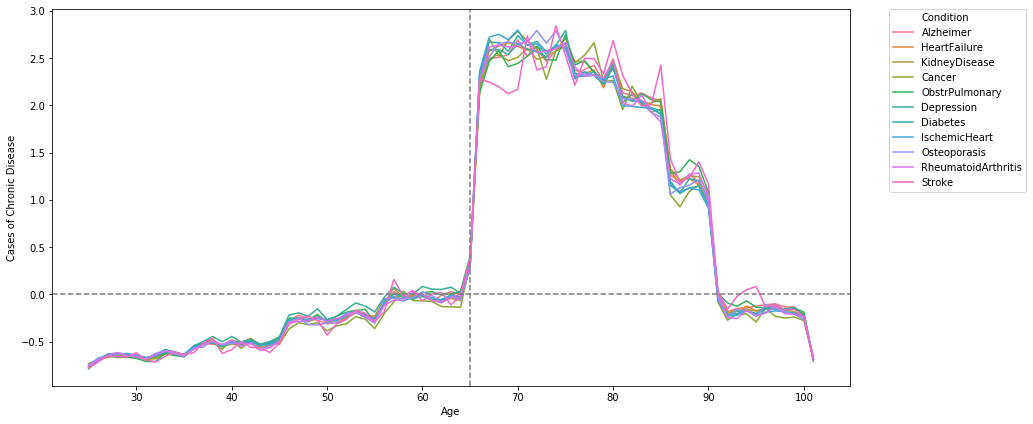

In [103]:
#palette = sns.color_palette("mako_r",10)

plt.figure(figsize=(12,6))

ax1 = sns.lineplot(x='Age',y='Count',
                      hue='Condition',
                   #palette = palette,
                   sizes = (0.05,1.4),
                      data=age_chronics_melt[age_chronics_melt.Set=='Train'])

ax1.set(ylabel='Cases of Chronic Disease')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(y = 0,linestyle='--', color='grey')
plt.axvline(x = 65, linestyle='--', color='grey')

ax1.figure.savefig("../visualizations/aiko/age_Chronic_scaled.png",bbox_inches='tight')
# ax2 = plt.subplot(212)
# ax2 = sns.lineplot(x='Age',y=np.log(age_chronics_melt.Count),
#                       hue='Condition',
#                       data=age_chronics_melt[age_chronics_melt.Set=='Train'])

# ax2.set(ylabel='Cases of Chronic Disease')
# plt.tight_layout()
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#ax2.figure.savefig("./visualizations/aiko/age_logChronic.png",bbox_inches='tight')

Yes they show the same trend as the number of claims

#### In order to make sure the insurance premiums can cover the claims, the insurance company would need to categorize the patients according to their resource usage. In answering the question of what types of patients would make more outpatient visits, please provide your findings.

Not sure how best to tackle this. Going with the theme of Age and adding Gender and Number of Chronic Diseases... 

In [108]:
#out = data[data.Status=='out']
arg = data.groupby(['Age','Gender','Race'])['BeneID'].nunique().reset_index()
arg

,Age,Gender,Race,BeneID
0,25.0,0,1,13
1,25.0,0,2,1
2,25.0,0,3,1
3,25.0,0,5,1
4,25.0,1,1,16
...,...,...,...,...
609,101.0,0,3,4
610,101.0,0,5,4
611,101.0,1,1,66
612,101.0,1,2,5


In [197]:
arg['Risk'] = pd.qcut(arg.ClaimID, 3, labels=['Low','Medium','High'], duplicates='drop')

In [129]:
arg.columns

Index(['Age', 'Gender', 'NumChronics', 'ClaimID', 'Risk'], dtype='object')

In [132]:
outR = out.merge(arg[['Age', 'Gender', 'NumChronics','Risk']], on = ['Age', 'Gender', 'NumChronics'], how='left')

Let's see how separable the data is

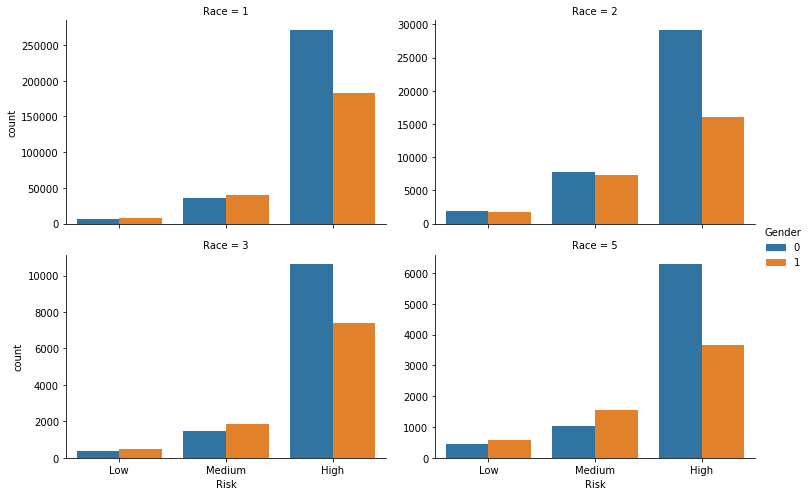

In [151]:
sns.catplot(x='Risk', 
            hue='Gender', 
            col='Race', 
            kind='count',
            col_wrap=2,
            height=3.5,
            aspect=1.5,
            sharey=False,
            data=outR)

Men, what I'm guessing Gender 0 to be, are overrepresented in the High Risk category we created - across all racial groups. Imbalance in Race5 for women in the medium risk category

#### In answering what types of patients would make more inpatient service claims, please provide your findings.

From the prospect of the insurance company, the reimbursed amounts are their coverage on the
claims.  Please analyze the patterns of the total reimbursed amounts 
(or average reimbursed amounts/visit) vs different types of patients.

In [152]:
dataR = data.merge(arg[['Age', 'Gender', 'NumChronics','Risk']], on = ['Age', 'Gender', 'NumChronics'], how='left')

In [175]:
reimMean = dataR.groupby(['Risk','Gender','Race'])['InscClaimAmtReimbursed'].mean().reset_index()
reimTotal = dataR.groupby(['Risk','Gender','Race'])['InscClaimAmtReimbursed'].sum().reset_index()
reimTotal['logReim'] = np.log(reimTotal.InscClaimAmtReimbursed)

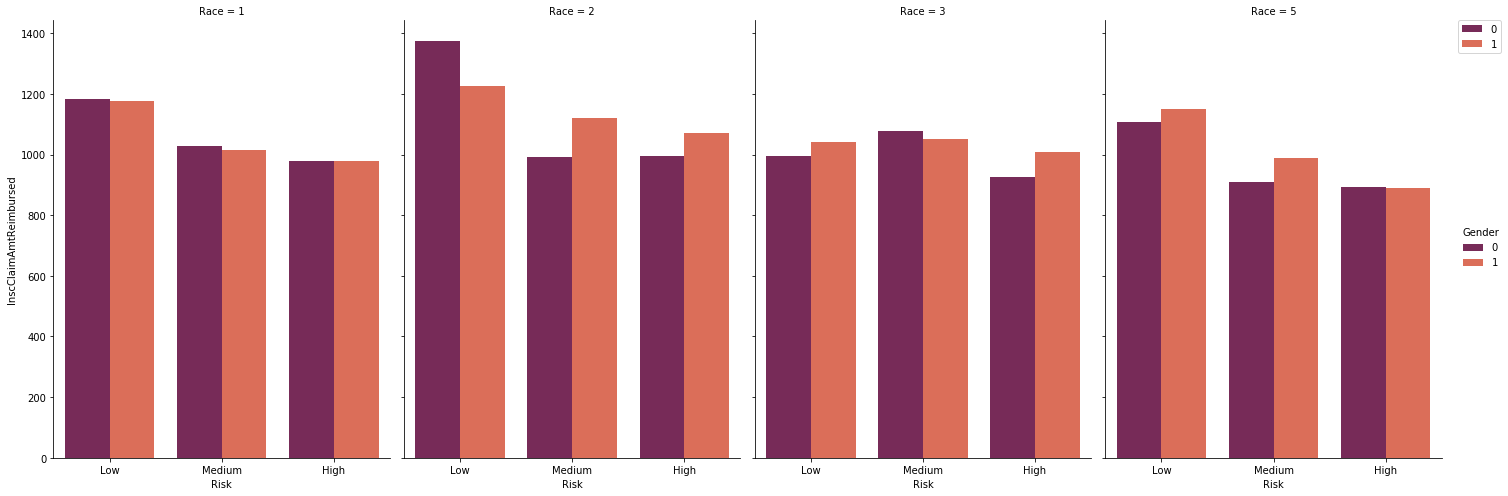

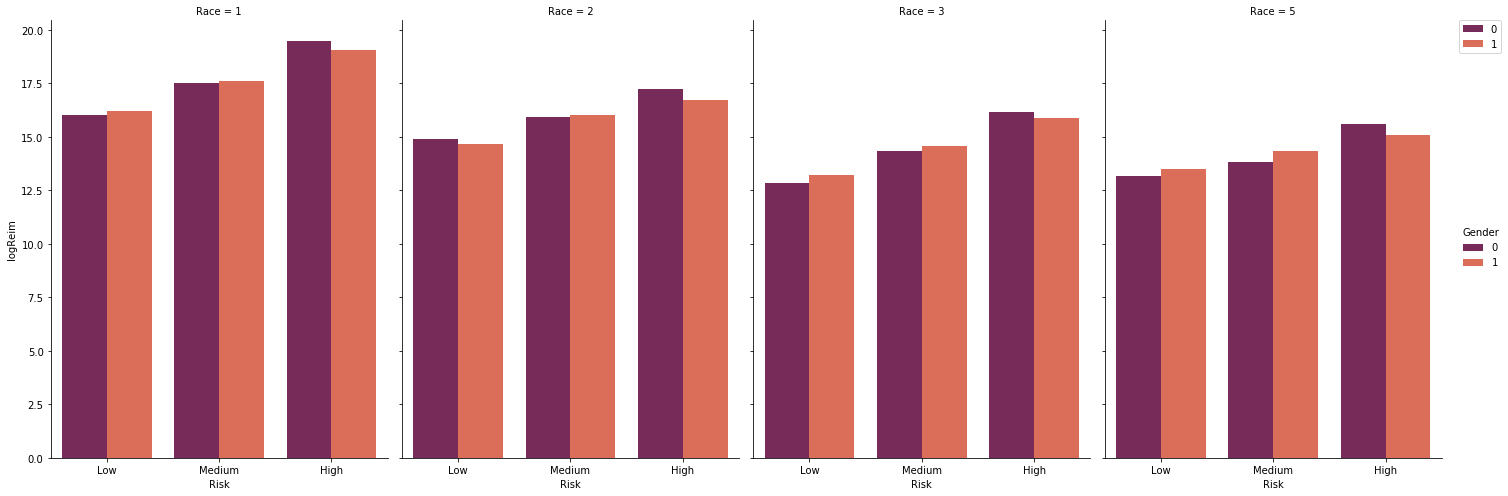

In [189]:
#ax1 = plt.subplot(211)
ax1= sns.catplot(x='Risk', y='InscClaimAmtReimbursed', 
            hue = 'Gender',
            palette="rocket",
            col='Race',
            kind='bar',
            #col_wrap=2,
            height=7,
            aspect=0.7,
           data=reimMean)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax1.savefig("./visualizations/aiko/risk_meanReim.png",bbox_inches='tight')
#ax2 = plt.subplot(212)
ax2= sns.catplot(x='Risk', y='logReim', 
            hue = 'Gender',
            palette="rocket",
            col='Race',
            kind='bar',
            #col_wrap=2,
            height=7,
            aspect=0.7,
           data=reimTotal)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.savefig("./visualizations/aiko/risk_TotalReim.png",bbox_inches='tight')


Race2 has noticeably higher mean Insurance reimbursments for low risk patients. 

#### From the perspective of the providers, the sum of reimbursed amounts and deductibles are flowing to the providers. Based on this, analyze which types of patients contribute more to the providers in terms of the aggregate charges or the average charge per visit. 